# Clustering Analysis

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing Data and Creating Subset](#02.-Viewing-Data-and-Creating-Subset)
* [03. Prepping for Cluster Analysis](#03.-Prepping-for-Cluster-Analysis)
* [04. Plotting Clusters](#04.-Plotting-Clusters)
* [05. Cluster Statistics](#05.-Cluster-Statistics)

# 01. Importing Libraries and Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Disregard warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Import data 
df_cluster = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_map.pkl')

# 02. Viewing Data and Creating Subset

In [5]:
# Dimensions 
df_cluster.shape

(31016, 17)

In [6]:
# Previewing 
df_cluster.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


k-means only works with numerical values

In [7]:
# Create subset with numerical values I want to analyze
df_sub = df_cluster[['annual_housing_cost', 'annual_healthcare_cost','annual_other_necessities_cost', 'annual_total_cost', 'median_family_income']]

In [8]:
# Descriptive stats for subset 
df_sub.describe()

,annual_housing_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_total_cost,median_family_income
count,31016.000000,31016.000000,31016.000000,31016.000000,31016.000000
mean,10854.763501,13374.555032,6912.540025,70135.451564,67647.731668
std,3564.639705,5205.739345,2190.278921,20630.625374,15581.223633
min,4209.311280,3476.379960,2611.642080,30087.662400,25529.976560
25%,8580.000000,9630.382320,5268.189420,53506.390200,57067.654297
50%,10356.000000,13072.146000,6686.049660,70646.836200,65706.601560
75%,12348.000000,16621.341600,8357.909160,84846.249300,75744.851560
max,30792.000000,37252.274400,15993.537600,146874.276000,134261.609400


do not have to standardize the data. variables are within a suitable scale.

# 03. Prepping for Cluster Analysis

In [9]:
# Set range of potential clusters 
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
# Checking variation scores for each cluster 
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

[-22113723948158.43,
 -12150761562131.666,
 -8789287119547.668,
 -7069830554501.925,
 -5775862013731.048,
 -5076031146533.6875,
 -4444320228084.74,
 -3924795123305.9688,
 -3585930410394.9727]

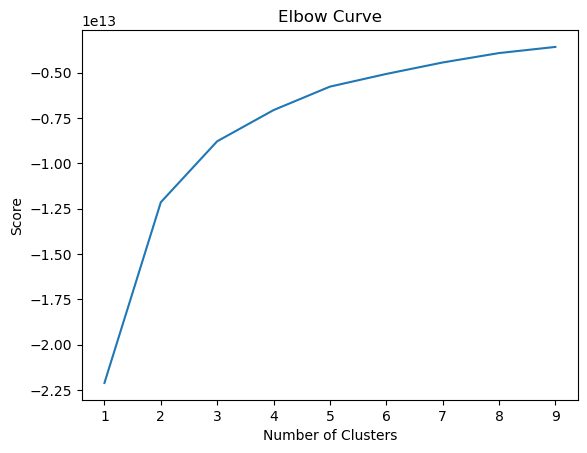

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's an increase until 5 on the x-axis. After that, the curve straightens out. This means that the optimal count of clusters is 5.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=5)

In [14]:
# Adding new cluster column to df
df_sub['clusters'] = kmeans.fit_predict(df_sub)

In [15]:
# Viewing new cluster column in df 
df_sub.head()

,annual_housing_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_total_cost,median_family_income,clusters
0,8505.72876,5737.47984,4333.81344,39254.0532,73010.41406,3
1,12067.50240,8659.55640,6217.45896,57194.3256,73010.41406,0
2,12067.50240,11581.63260,7075.65816,76141.0308,73010.41406,4
3,15257.15040,14503.70760,9134.35620,94203.5328,73010.41406,4
4,15257.15040,17425.78560,9942.36396,100823.5200,73010.41406,4


In [16]:
# Checking counts for each cluster in df 
df_sub['clusters'].value_counts()

clusters
4    8163
2    8139
3    7310
0    4838
1    2566
Name: count, dtype: int64

Cluster 1 and cluster 4 occur the most while cluster 0 occurs the least. 

# 04. Plotting Clusters 

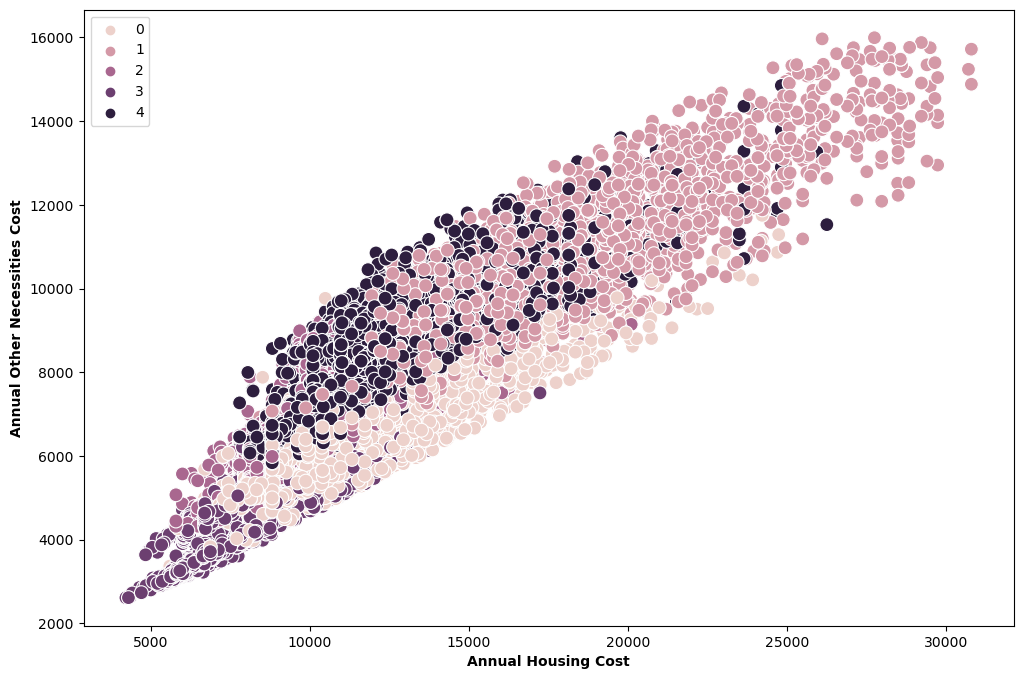

In [17]:
# Plot the clusters for the "annual housing cost" and "annual other necessities" variables.

bar1 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['annual_housing_cost'], y=df_sub['annual_other_necessities_cost'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Annual Housing Cost', fontweight = 'bold') 
plt.ylabel('Annual Other Necessities Cost', fontweight = 'bold') 
plt.show()

According to value counts:

Most of the groups have data points for housing around 10k-20k and between 6k-12k for other necessities. 

Most data points falling within these cost ranges shows that most people spend a median amount of money on costs and are thus, middle income. 

Cluster 0 has the least amount of data points. This cluster shows the group of people who spend the most on housing and on other necessities annually (top right), making them on the higher end of spending than the rest of the groups. If you can afford to spend this much on these costs, you must be making more money, and thus be high income. It makes sense that this group has the least amount of points because there are less people who are high income when compared to middle income and low income people.

Clusters 4 and 1 have the most amount of data points and sit in the middle end of housing cost and other necessities. Indicating that most people fall within this median-spending/middle income range. 

Previous exercise showed a linear connection between these 2 variables and these clusters give us more insight into the different types of groups. 

In [18]:
# Export figure 
bar1.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/cluster1.png', bbox_inches='tight')

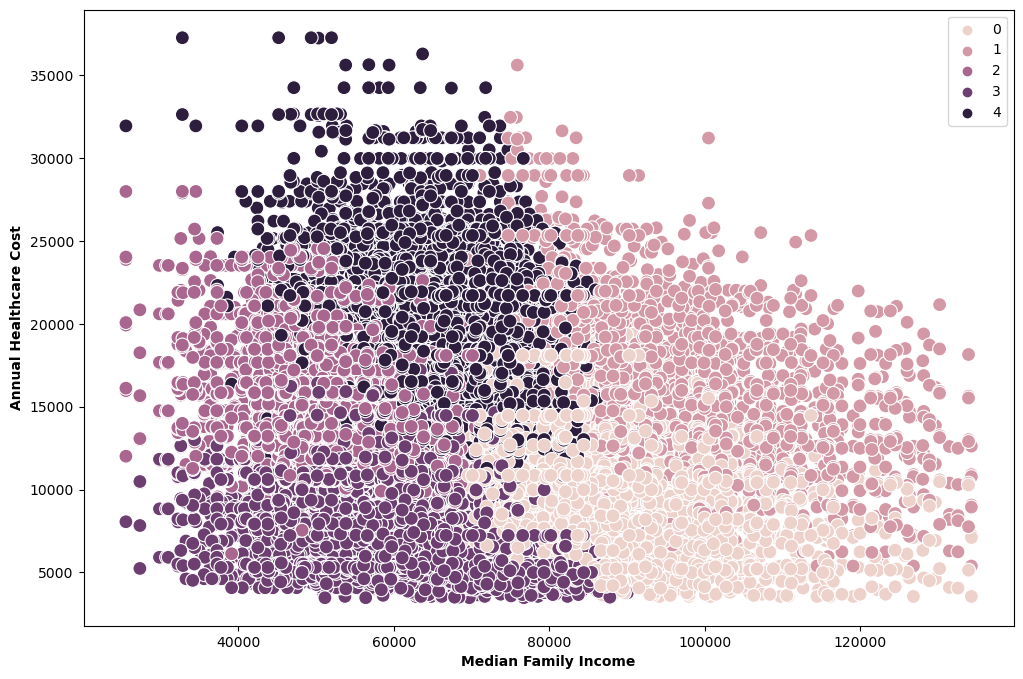

In [19]:
# Plot the clusters for the "median family income" and "annual healthcare cost" variables.

bar2 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['median_family_income'], y=df_sub['annual_healthcare_cost'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Median Family Income', fontweight = 'bold') 
plt.ylabel('Annual Healthcare Cost', fontweight = 'bold') 
plt.show()

Cluster 2 shows the group of people who make anywhere from 40k-85k and spend the least on annual healthcare.

Cluster 1 shows group of people who are middle income and spend the highest amounts in annual healthcare.

Cluster 3 shows group of people who are on the higher end of income making from 80-120k+ and spending little on annual healthcare.

Cluster 4 shows group of people who make the least income and spend a lot on annual healthcare.  

Cluster 0 shows group of people who are on higher end of income and spending a lot on annual healthcare. 

In previous exercise, there was no linear connection between these 2 variables.

Clusters 1 & 4 have the most points while cluster 0 has the least data points.

So, again, there are more people who are low and middle income than high income.

In [20]:
# Export figure 
bar2.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/cluster2.png', bbox_inches='tight')

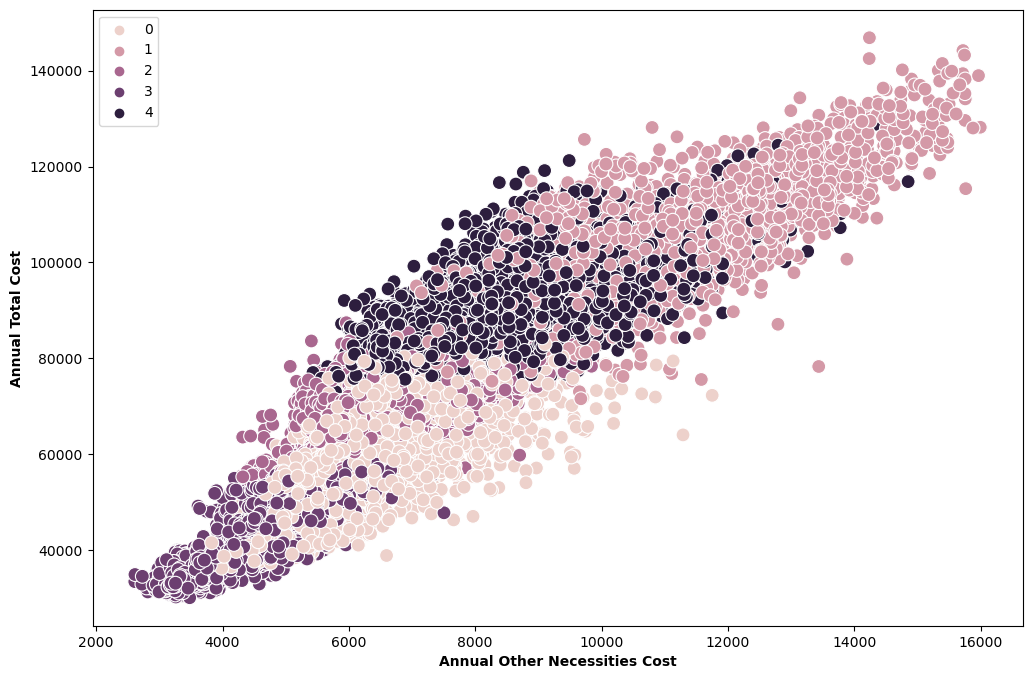

In [21]:
# Plot the clusters for the "annual other necessities cost" and "annual total cost" variables.

bar3 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['annual_other_necessities_cost'], y=df_sub['annual_total_cost'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Annual Other Necessities Cost', fontweight = 'bold') 
plt.ylabel('Annual Total Cost', fontweight = 'bold') 
plt.show()

Cluster 2 is people who spend the least on other necessities and overall annually.

Cluster 1 is people who spend 100k-110k overall and spend on the higher end of other necessities. 

Cluster 3 is people who spend 40k-80k overall and spend on the lower end of other necessities. 

Cluster 4 is people who spend from 60k-80k and spend little on other necessities.

Cluster 0 is people who spend the most on other necessities and overall annually. 

Again, there are more people who spend on the lower amount in regard to expenses.

In [22]:
# Export figure 
bar3.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/cluster3.png', bbox_inches='tight')

# 05. Cluster Statistics

In [23]:
# Assigning colors to each cluster in cluster column 
df_sub.loc[df_sub['clusters'] == 4, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = 'medium purple'
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'pink'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
# Grouping mean and median for each value for each cluster
df_sub.groupby('cluster').agg({'median_family_income':['mean', 'median'], 
                         'annual_housing_cost':['mean', 'median'], 
                        'annual_total_cost':['mean', 'median'],
                         'annual_healthcare_cost':['mean', 'median'],
                          'annual_other_necessities_cost':['mean', 'median']})

median_family_income              annual_housing_cost  \
                              mean       median                mean   
cluster                                                               
dark purple           67163.410655  67466.57813        12515.472666   
light pink            83096.318283  80275.71875        10814.813553   
medium purple         61291.012958  61949.44141         7616.290887   
pink                  95788.712600  92981.14844        18063.882988   
purple                55787.688307  56400.47266         9848.686972   

                          annual_total_cost               \
                   median              mean       median   
cluster                                                    
dark purple    12096.0000      88987.305141   87835.9572   
light pink     10284.0000      62079.200210   62824.5414   
medium purple   7452.0000      44109.206720   46203.1848   
pink           17528.4666     102673.647397  102056.9532   
purple          9624.0000      69133.768632   69309.6444   

              annual_healthcare_cost               \
                                mean       median   
cluster                                             
dark purple             18209.675338  17884.77840   
light pink              10490.522011  10436.45364   
medium purple            7989.846082   7893.24282   
pink                    15869.050002  15633.29760   
purple                  14289.312745  14002.50000   

              annual_other_necessities_cost               
                                       mean       median  
cluster                                                   
dark purple                     8615.866901   8543.81400  
light pink                      6284.520851   6142.02828  
medium purple                   4376.539776   4499.51532  
pink                           10745.819424  10558.79994  
purple                          6646.667851   6454.92192

Findings:

1) The clusters are pretty diverse in regard to these categories indicating that they have distinct economic profiles and expenditure patterns.
2) There is a disparity in income levels, with mean income ranging from 55k-95k.
3) Housing affordability differs across clusters with mean housing costs ranging from 7k to 18k.
4) There is a difference in access to healthcare among the clusters given mean values range from 7k-18k.
5) Light pink cluster has the highest statistics in almost every category. It is evident that the light pink cluster has the highest median family income mean (highest income). All the associated costs are higher than any other cluster which implies that people in this cluster have higher spending habits.
6) Purple has lowest statistics in almost every category. Seems to be people who are low income.

These results could be useful for breaking down these clusters into different income levels and using these new labels to analyze them against other variables.